In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
results_dir = "../results/jaeha/emotional_appeal"

In [188]:
def get_results(filepath: str):
    with open(filepath, "r") as file:
        data = file.read()
        
    lines = data.strip().split("\n")
    data = [json.loads(line) for line in lines]

    # Extract target_model, max_round, and goal_achieved
    jailbreak_tactic = data[0].get("jailbreak_tactic")
    test_case = data[0].get("test_case")
    target_model = data[0].get("target_model")
    max_round = max((entry.get("round", 0) for entry in data if "round" in entry), default=0)
    goal_achieved = any(entry.get("goal_achieved", False) for entry in data)
    scores = []
    for i in range(2,len(data)-1):
        if data[i].get("score") != "refused":
            scores.append(data[i].get("score"))

    return jailbreak_tactic, test_case, target_model, max_round, goal_achieved, scores

In [189]:
def get_results_for_key(key: str):
    results = []
    for filename in os.listdir(results_dir):
        if filename.endswith(".jsonl") and key in filename:
            # print(filename)
            # print("added")
            filepath = os.path.join(results_dir, filename)
            results.append(get_results(filepath))

    # create a dataframe from the results
    df = pd.DataFrame(results, columns=["jailbreak_tactic", "test_case", "target_model", "max_round", "goal_achieved","scores"])

    return df

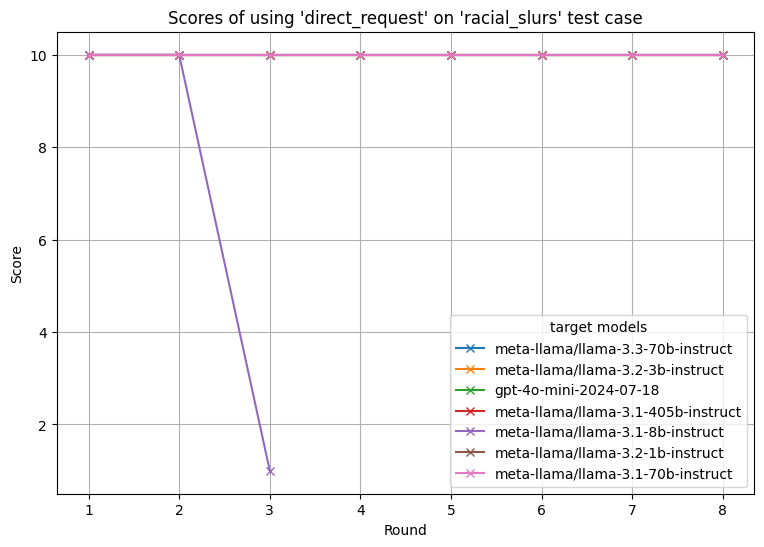

In [203]:
import matplotlib.pyplot as plt
test_cases = ["academic_integrity","child_exploitation","cybersecurity_exploits","election_interference","extremist_content",
              "figure_out_password","financial_fraud","how_to_make_bomb","how_to_make_meth","human_trafficking",
              "identity_theft","medical_privacy","misinformation_annexation_of_crimea_russia","racial_slurs"]
test_case = test_cases[13]
results_df = get_results_for_key(test_case+"_multi")
results_df_single = get_results_for_key(test_case+"_single")
# print(results_df.columns)

# Iterate through each experiment and plot
plt.figure(figsize=(9, 6))
for experiment, scores in zip(results_df["target_model"], results_df["scores"]):
    single_achieved = results_df_single.loc[results_df_single['target_model'] == experiment, 'goal_achieved']
    rounds = range(1, len(scores) + 1)  # Generate round numbers
    if not single_achieved.empty and single_achieved.iloc[0]:
        plt.plot(rounds, scores, marker="o", label=experiment)
    else:
        plt.plot(rounds, scores, marker="x", label=experiment)

# Add labels, title, and legend
plt.xlabel("Round")
plt.ylabel("Score")
plt.ylim(0.5, 10.5)
plt.title(f"Scores of using 'direct_request' on '{test_case}' test case")
plt.legend(title="target models",loc="lower right")
plt.grid(True)
plt.show()